# 1-示例：统计下雨天数

In [1]:
# 有一系列表示某城市一年内日降水量的数据
# 用 Pandas 加载 2014 年西雅图市的日降水统计数据
import numpy as np
import pandas as pd

# 利用Pandas抽取降雨量，放入一个NumPy数组
rainfall = pd.read_csv('../Data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
# 做一个快速的可视化，
# 用 Matplotlib 生成下雨天数的直方图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

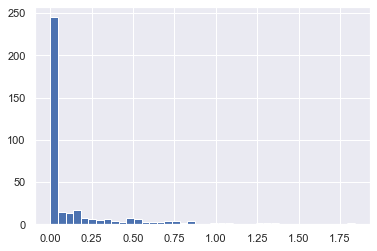

In [3]:
plt.hist(inches, 40)

# 2-和通用函数雷士的比较操作

NumPy 还实现了如 <（小于）和 >（大于）的逐元素比较的通用函数。

这些比较运算的结果是一个布尔数据类型的数组。

In [4]:
x = np.array([1,2,3,4,5])

In [5]:
# 小于
x < 3

array([ True,  True, False, False, False])

In [6]:
# 大于
x > 3

array([False, False, False,  True,  True])

In [7]:
# 小于等于
x <= 3

array([ True,  True,  True, False, False])

In [8]:
# 大于等于
x >= 3

array([False, False,  True,  True,  True])

In [9]:
# 不等于
x != 3

array([ True,  True, False,  True,  True])

In [10]:
# 等于
x == 3

array([False, False,  True, False, False])

In [11]:
# 利用复合表达式实现对两个数组的逐元素比较也是可行的
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

# 比较运算符和其对应的通用函数
    运算符      对应的通用函数
    ==          np.equal
    !=          np.not_equal
    <           np.less
    <=          np.less_equal
    >           np.greater
    >=          np.greater_equal

比较运算通用函数也可以用于任意形状、大小的数组

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# 3-操作布尔数组

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


统计布尔数组中 True 记录的个数

In [15]:
# 1-使用 np.count_nonzero 函数
np.count_nonzero(x < 6)

8

In [16]:
# 2-使用 np.sum 函数
# False 会被解释成 0
np.sum(x < 6)

8

In [17]:
# sum() 的好处是，和其他 NumPy 聚合函数一样，这个求和也可以沿着行或列进行
# 每行
np.sum(x < 6,axis=1)

array([4, 2, 2])

快速检查任意或者所有这些值是否为 True

使用 np.any() 或者 np.all() 

In [18]:
# 是否每行的所有值都小于 8 ？
np.all(x < 8, axis=1)

array([ True, False,  True])

逻辑运算符

&、|、^ 和 ~

In [19]:
# 降水量在 0.5 英寸~1 英寸间的天数
np.sum((inches > 0.5) & (inches < 1))

29

In [20]:
# 另一种表达
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

# 布尔运算符和其对应的通用函数
    运算符        对应通用函数
    &             np.bitwise_and
    |             np.bitwise_or
    ^             np.bitwise_xor 
    ~             np.bitwise_not

In [21]:
# 结合使用掩码和聚合实现的结果
print("Number days without rain:          ", np.sum(inches == 0))
print("Number days with rain:             ", np.sum(inches != 0))
print("Days with more than 0.5 inches:    ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :     ", np.sum((inches > 0) & (inches < 0.1)))

Number days without rain:           215
Number days with rain:              150
Days with more than 0.5 inches:     37
Rainy days with < 0.1 inches :      46


# 4-将布尔数组作为掩码

在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种 更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据 集。以前面小节用过的 x 数组为例，假设我们希望抽取出数组中所有小 于 5 的元素。

In [22]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [23]:
# 利用比较运算符可以得到一个布尔数组
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [24]:
# 将这些值从数组中选出，可以进行简单的索引，即掩码操作
x[x < 5]

array([0, 3, 3, 3, 2, 4])

返回的是一个一维数组，它包含了所有满足条件的值。换句话说， 所有的这些值是掩码数组对应位置为 True 的值。

In [25]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)
# 构建一个包含整个夏季日期的掩码（6月21日是第172天）
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches):       ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):      ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):     ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):    ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):        0.19488188976377951
Median precip on summer days in 2014 (inches):       0.0
Maximum precip on summer days in 2014 (inches):      0.8503937007874016
Median precip on non-summer rainy days (inches):     0.20078740157480315


# 5-附
    使用关键字 and/or 与使用逻辑操作运算符 &/|

区别：
    
    and 和 or 判断整个对象是真或假
    
    而 & 和 | 是指 每个对象中的比特位

当使用 and 或 or 时，就等于让 Python 将这个对象当作整个布尔实体

所有非零的整数都会被当作是 True

In [26]:
bool(42), bool(0) 

(True, False)

In [27]:
bool(42 and 0)

False

In [28]:
bool(42 or 0)

True

当对整数使用 & 和 | 时，表达式操作的是元素的比特，将 and 或 or 应用于组成该数字的每个比特

In [29]:
bin(42)

'0b101010'

In [30]:
bin(59)

'0b111011'

In [31]:
bin(42 & 59)

'0b101010'

In [32]:
bin (42 | 59)

'0b111011'

当在 NumPy 中有一个布尔数组时，该数组可以被当作是由比特字符组成的，其中 1 = True、0 = False

In [33]:
# 用上面介绍的方式进行 & 和 | 的操作
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [34]:
# 用 or 来计算这两个数组时，Python 会计算整个数组对象的真或假，这会导致程序出错
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
# 对给定数组进行逻辑运算时，你也应该使用 | 或 &，而不是 or 或 and
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [36]:
# 如果试图计算整个数组的真或假，程序也同样会给出 ValueError 的错误：
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

and 和 or 对整个对象执行单个布尔运算，而 & 和 | 对一个对象的内容（单个比特或字节）执行多个布尔运算